# Metadata Analyse

This notebook looks a little deeper into the metadata.

In particular, it looks at the different sample lengths and sample rates in Hz.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from typing import Any

import _defaults
from _defaults import (
    datasets_labels,
    init_notebook,
    load_datasets,
)
from matplotlib.patches import ConnectionPatch, Rectangle
import matplotlib.pyplot as plt
from tabulate import tabulate

from slki.config import Config

In [3]:
init_notebook()

Load only the meta data.

In [4]:
# Note that the caching algorithm does not care about the `LOAD_METADATA_ONLY` flag.
# It is advised to (a) load the dataset including the data once or (b) disable caching.
Config.LOAD_METADATA_ONLY = True
_defaults.CACHING_ENABLED = False
metadata = [dataset.get_metadata() for dataset in load_datasets()]

[INFO] [slki.data.import][data_import.py:537]  7 meta data files found.
[INFO] [slki.data.import][data_import.py:594]  Loading meta data from '/home/lab/slki/Dataset/preprecessed/v4/fernverkehr-points-kionix-sh-z-dt_1-meta.pkl'...
[INFO] [slki.data.import][data_import.py:594]  Loading meta data from '/home/lab/slki/Dataset/preprecessed/v4/fernverkehr-points-kionix-sh-z-dt_2-meta.pkl'...
[INFO] [slki.data.import][data_import.py:594]  Loading meta data from '/home/lab/slki/Dataset/preprecessed/v4/fernverkehr-points-kionix-sh-z-dt_3-meta.pkl'...
[INFO] [slki.data.import][data_import.py:594]  Loading meta data from '/home/lab/slki/Dataset/preprecessed/v4/fernverkehr-points-kionix-sh-z-dt_4-meta.pkl'...
[INFO] [slki.data.import][data_import.py:594]  Loading meta data from '/home/lab/slki/Dataset/preprecessed/v4/fernverkehr-points-kionix-sh-z-dt_5-meta.pkl'...
[INFO] [slki.data.import][data_import.py:594]  Loading meta data from '/home/lab/slki/Dataset/preprecessed/v4/fernverkehr-points-kion

[INFO] [slki.data.import][data_import.py:594]  Loading meta data from '/home/lab/slki/Dataset/preprecessed/v4/gueterzuege-points-kionix-sh-z-dt_2-meta.pkl'...
[INFO] [slki.data.import][data_import.py:175]  Concatenate all data chunks.
[INFO] [slki.data.import][data_import.py:537]  6 meta data files found.
[INFO] [slki.data.import][data_import.py:594]  Loading meta data from '/home/lab/slki/Dataset/preprecessed/v4/regioverkehr-points-kionix-sh-z-dt_1-meta.pkl'...
[INFO] [slki.data.import][data_import.py:594]  Loading meta data from '/home/lab/slki/Dataset/preprecessed/v4/regioverkehr-points-kionix-sh-z-dt_2-meta.pkl'...
[INFO] [slki.data.import][data_import.py:594]  Loading meta data from '/home/lab/slki/Dataset/preprecessed/v4/regioverkehr-points-kionix-sh-z-dt_3-meta.pkl'...
[INFO] [slki.data.import][data_import.py:594]  Loading meta data from '/home/lab/slki/Dataset/preprecessed/v4/regioverkehr-points-kionix-sh-z-dt_4-meta.pkl'...
[INFO] [slki.data.import][data_import.py:594]  Loadin

## Common functions

In [5]:
def filter_attr(meta: list[dict[str, Any]], attr: str) -> list[Any]:
    """Common function to filter one attribute from all meta data."""
    return [m[attr] for m in meta]

In [6]:
def draw_boundaries(ax: plt.Axes, lower_bound: int | float, upper_bound: int | float):
    """Draws boundaries on a plot."""
    # draw boundary lines
    ax.axhline(y=lower_bound, color="r", linestyle="-")
    ax.axhline(y=upper_bound, color="r", linestyle="-")

    # add colors to the different areas
    # inside boundary (blue), outside boundary (red)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    rect_kwargs = {"linewidth": 1, "edgecolor": "none", "alpha": 0.1}
    ax.add_patch(Rectangle((xlim[0], ylim[0]), xlim[1], -ylim[0] + lower_bound, facecolor="r", **rect_kwargs))
    ax.add_patch(Rectangle((xlim[0], lower_bound), xlim[1], upper_bound - lower_bound, facecolor="b", **rect_kwargs))
    ax.add_patch(Rectangle((xlim[0], upper_bound), xlim[1], ylim[1] - upper_bound, facecolor="r", **rect_kwargs))

## Sample Lengths

In [7]:
SAMPLE_LENGTH_LOWER_BOUND = Config.SAMPLE_LENGTH_LOWER_BOUND or 0
SAMPLE_LENGTH_UPPER_BOUND = Config.SAMPLE_LENGTH_UPPER_BOUND or float("inf")

In [8]:
print("Sample length")
print("lower bound:", SAMPLE_LENGTH_LOWER_BOUND)
print("upper bound:", SAMPLE_LENGTH_UPPER_BOUND)

Sample length
lower bound: 10000
upper bound: 2500000


In [9]:
datasets_samplelengths = [filter_attr(meta, "sample_length") for meta in metadata]

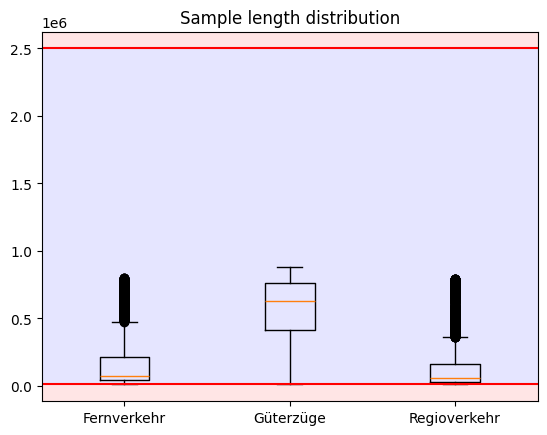

In [10]:
fig, ax = plt.subplots()
ax.title.set_text("Sample length distribution")
ax.boxplot(datasets_samplelengths, tick_labels=datasets_labels)
draw_boundaries(ax, SAMPLE_LENGTH_LOWER_BOUND, SAMPLE_LENGTH_UPPER_BOUND)
plt.show()

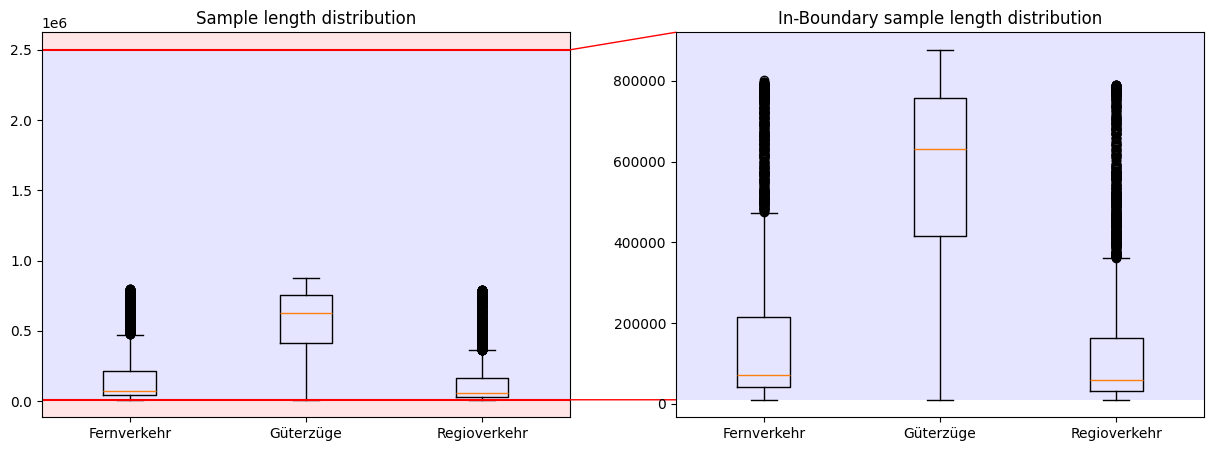

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# all data with outliers and boundaries
axes[0].title.set_text("Sample length distribution")
axes[0].boxplot(datasets_samplelengths, tick_labels=datasets_labels)
draw_boundaries(axes[0], SAMPLE_LENGTH_LOWER_BOUND, SAMPLE_LENGTH_UPPER_BOUND)

# only data inside boundaries
axes[1].title.set_text("In-Boundary sample length distribution")
axes[1].boxplot(
    [
        [
            samplelength
            for samplelength in samplelengths
            if SAMPLE_LENGTH_LOWER_BOUND <= samplelength <= SAMPLE_LENGTH_UPPER_BOUND
        ]
        for samplelengths in datasets_samplelengths
    ],
    tick_labels=datasets_labels,
)

# y-axis limits
ymin = max(axes[1].get_ylim()[0], SAMPLE_LENGTH_LOWER_BOUND)
ymax = min(axes[1].get_ylim()[1], SAMPLE_LENGTH_UPPER_BOUND)

# add colors
xlim = axes[1].get_xlim()
ylim = axes[1].get_ylim()
ylim = (ymin, ymax)
axes[1].add_patch(
    Rectangle((xlim[0], ylim[0]), xlim[1], ylim[1], linewidth=1, edgecolor="none", facecolor="b", alpha=0.1)
)

# add lines between the two plots
axes[1].add_artist(
    ConnectionPatch(
        axesA=axes[0],
        axesB=axes[1],
        coordsA="data",
        coordsB="data",
        color="red",
        xyA=(axes[0].get_xlim()[1], SAMPLE_LENGTH_LOWER_BOUND),
        xyB=(axes[1].get_xlim()[0], ymin),
    )
)
axes[1].add_artist(
    ConnectionPatch(
        axesA=axes[0],
        axesB=axes[1],
        coordsA="data",
        coordsB="data",
        color="red",
        xyA=(axes[0].get_xlim()[1], SAMPLE_LENGTH_UPPER_BOUND),
        xyB=(axes[1].get_xlim()[0], ymax),
    )
)

plt.show()

In [12]:
print(
    tabulate(
        zip(
            datasets_labels,
            [sum(n < SAMPLE_LENGTH_LOWER_BOUND for n in samplerate) for samplerate in datasets_samplelengths],
            [sum(n > SAMPLE_LENGTH_UPPER_BOUND for n in samplerate) for samplerate in datasets_samplelengths],
            strict=True,
        ),
        headers=["Dataset", f"< {SAMPLE_LENGTH_LOWER_BOUND}", f"> {SAMPLE_LENGTH_UPPER_BOUND}"],
    )
)

Dataset         < 10000    > 2500000
------------  ---------  -----------
Fernverkehr           0            0
Güterzüge             0            0
Regioverkehr          0            0


## Sample rate in Hz

In [13]:
SAMPLE_RATE_LOWER_BOUND = Config.SAMPLE_RATE_LOWER_BOUND or 0
SAMPLE_RATE_UPPER_BOUND = Config.SAMPLE_RATE_UPPER_BOUND or float("inf")

In [14]:
print("Sample rate")
print("lower bound:", SAMPLE_RATE_LOWER_BOUND)
print("upper bound:", SAMPLE_RATE_UPPER_BOUND)

Sample rate
lower bound: 10000
upper bound: 15000


In [15]:
datasets_samplerates = [filter_attr(meta, "sample_rate_in_hz") for meta in metadata]

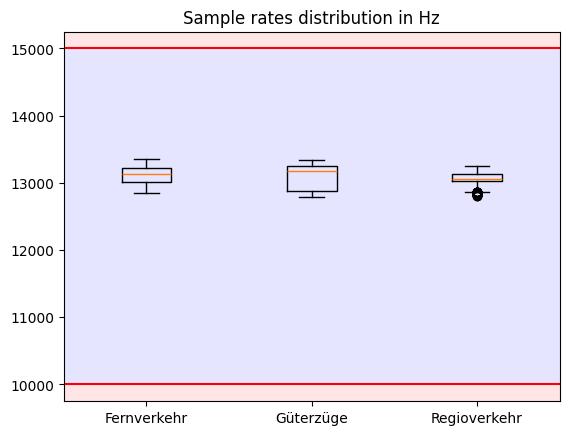

In [16]:
fig, ax = plt.subplots()
ax.title.set_text("Sample rates distribution in Hz")
ax.boxplot(datasets_samplerates, tick_labels=datasets_labels)
draw_boundaries(ax, SAMPLE_RATE_LOWER_BOUND, SAMPLE_RATE_UPPER_BOUND)
plt.show()

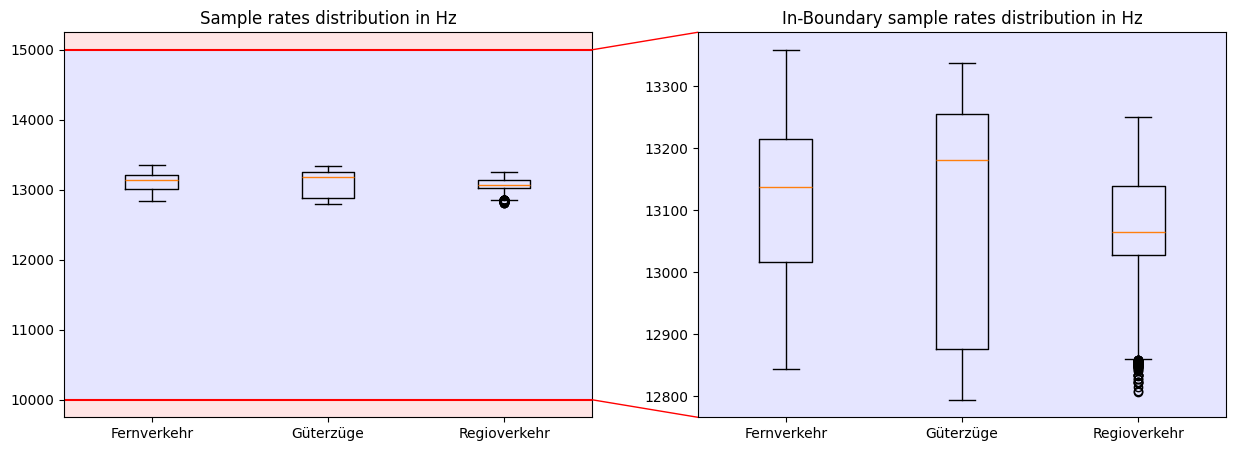

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# all data with outliers and boundaries
axes[0].title.set_text("Sample rates distribution in Hz")
axes[0].boxplot(datasets_samplerates, tick_labels=datasets_labels)
draw_boundaries(axes[0], SAMPLE_RATE_LOWER_BOUND, SAMPLE_RATE_UPPER_BOUND)

# only data inside boundaries
axes[1].title.set_text("In-Boundary sample rates distribution in Hz")
axes[1].boxplot(
    [
        [samplerate for samplerate in samplerates if SAMPLE_RATE_LOWER_BOUND <= samplerate <= SAMPLE_RATE_UPPER_BOUND]
        for samplerates in datasets_samplerates
    ],
    tick_labels=datasets_labels,
)
# add colors
xlim = axes[1].get_xlim()
ylim = axes[1].get_ylim()
axes[1].add_patch(
    Rectangle((xlim[0], ylim[0]), xlim[1], ylim[1], linewidth=1, edgecolor="none", facecolor="b", alpha=0.1)
)

# add lines between the two plots
axes[1].add_artist(
    ConnectionPatch(
        axesA=axes[0],
        axesB=axes[1],
        coordsA="data",
        coordsB="data",
        color="red",
        xyA=(axes[0].get_xlim()[1], SAMPLE_RATE_LOWER_BOUND),
        xyB=(axes[1].get_xlim()[0], max(axes[1].get_ylim()[0], SAMPLE_RATE_LOWER_BOUND)),
    )
)
axes[1].add_artist(
    ConnectionPatch(
        axesA=axes[0],
        axesB=axes[1],
        coordsA="data",
        coordsB="data",
        color="red",
        xyA=(axes[0].get_xlim()[1], SAMPLE_RATE_UPPER_BOUND),
        xyB=(axes[1].get_xlim()[0], min(axes[1].get_ylim()[1], SAMPLE_RATE_UPPER_BOUND)),
    )
)

plt.show()

In [18]:
print(
    tabulate(
        zip(
            datasets_labels,
            [sum(n < SAMPLE_RATE_LOWER_BOUND for n in samplerate) for samplerate in datasets_samplerates],
            [sum(n > SAMPLE_RATE_UPPER_BOUND for n in samplerate) for samplerate in datasets_samplerates],
            strict=True,
        ),
        headers=["Dataset", f"< {SAMPLE_RATE_LOWER_BOUND}", f"> {SAMPLE_RATE_UPPER_BOUND}"],
    )
)

Dataset         < 10000    > 15000
------------  ---------  ---------
Fernverkehr           0          0
Güterzüge             0          0
Regioverkehr          0          0
